# Lista 2
### równanie logistyczne i model Ehrenfesta

# zadanie 1
Napisz program w Pythonie implementujący równanie logistyczne w postaci $c_{t+1} = ac_t(1 − c_t)$ i zwracający jako wynik rysunek przedstawiający dwie trajektorie startujące z dwóch różnych warunków początkowych $c_0$ dla ustalonej wartości $a$. Wybierz takie wartości parametrów, aby odtworzyć rysunki znajdujące się w prezentacji na eportalu w kafelku wstęp.

$ a \in [2,4]$, $x_0 \in [0,1]$

In [1]:
import matplotlib.pyplot as plt

In [2]:
def ct1(a, x0):
    l = [x0]
    for x in range(100):
        l.append(a * l[x] * (1 - l[x]))
    return l

In [6]:
a = 2.9
x0 = 0.7
y0 = 0.6

data1 = ct1(a,x0)
data2 = ct1(a,y0)

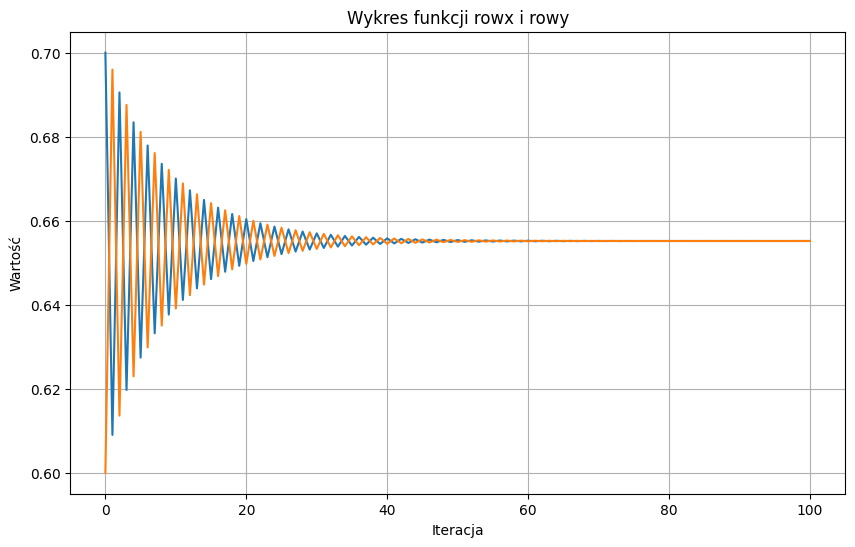

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data1)
plt.plot(data2)
plt.title('Wykres funkcji rowx i rowy')
plt.xlabel('Iteracja')
plt.ylabel('Wartość')
# plt.legend()
plt.grid(True)
plt.show()

### zadanie 3
Napisz program w Pythonie implementujący model Ehrenfesta z 1970 zdefiniowany następująco. Układ składa się z dwóch psów, oznaczonych przez
$A$ i $B$ oraz $N$ pcheł. W chwili początkowej wszystkie pchły znajdują się na psie $A$, tzn. $N_A(0) = N$, $N_B(0) = 0$. Następnie w każdym kroku czasowym z wszystkich $N$ pcheł wybierana jest losowo jedna pchła, która następnie
z prawdopodobieństwem $p$ przeskakuje na drugiego psa, a z prawdopodobieństwem $1 − p$ zostaje na tym psie, na którym była. Narysuj trajektorie $N_A(t)$ oraz $N_B(t)$. Jak na wyniki wpływa rozmiar układu $N$, a jak parametr ruchliwości $p$? Przygotuj odpowiednie rysunki na poparcie swoich
wniosków.


In [12]:
import random
import matplotlib.pyplot as plt


def ehrenfest_model(N, steps, p):
    # Początkowe ustawienie: wszystkie pchły na lewym psie
    NL = [N]
    NP = [0]

    # Symulacja
    for _ in range(steps):
        # Wybierz losowo jedną pchłę
        selected_flea = random.randint(1, N)

        # Pchła rzuca monetą: reszka zostaje na swoim psie, orzeł skacze na drugiego psa
        coin_flip = random.random()
        if coin_flip <= 1-p:  # reszka
            pass  # Pchła zostaje na swoim psie
        else:  # orzeł
            if selected_flea <= NL[-1]:  # Jeśli pchła była na lewym psie
                NL.append(NL[-1] - 1)
                NP.append(NP[-1] + 1)
            else:  # Jeśli pchła była na prawym psie
                NL.append(NL[-1] + 1)
                NP.append(NP[-1] - 1)

    return NL, NP



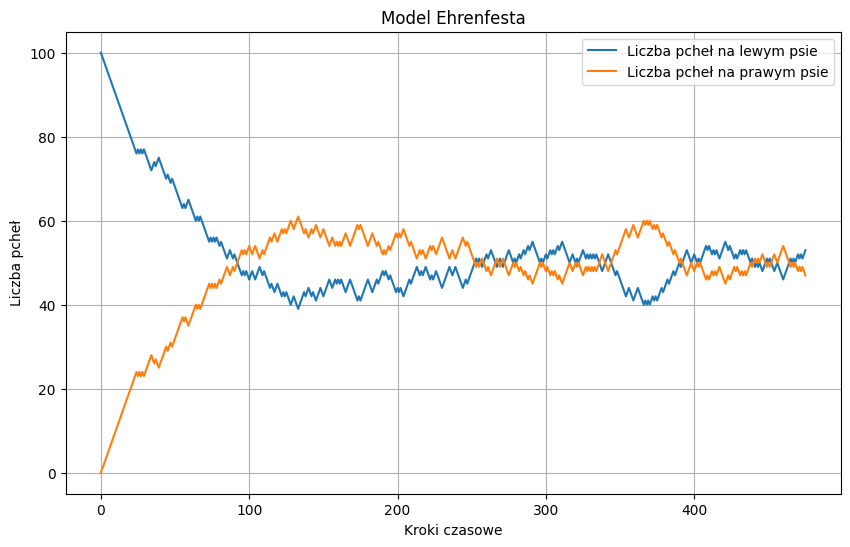

In [13]:
# Parametry modelu
N = 100  # Liczba pcheł
steps = 1000  # Liczba kroków czasowych
p = 1/2 # prawdopodobieństwo przeskoczenia na drugiego psa
# Symulacja modelu Ehrenfesta
NL, NP = ehrenfest_model(N, steps,p)

# Stworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(range(len(NL)), NL, label='Liczba pcheł na lewym psie')
plt.plot(range(len(NP)), NP, label='Liczba pcheł na prawym psie')
plt.title('Model Ehrenfesta')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba pcheł')
plt.legend()
plt.grid(True)
plt.show()

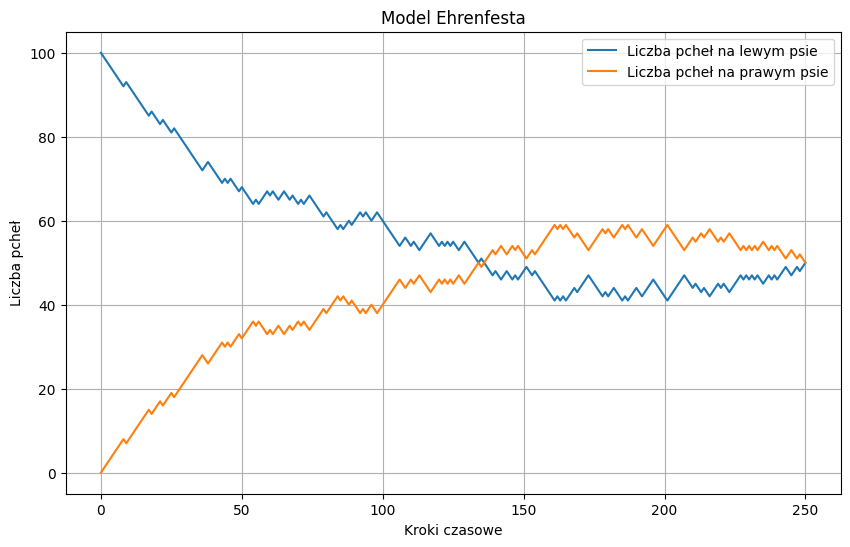

In [15]:
# zmiana prawdopodobieństwa
NL, NP = ehrenfest_model(N, steps,1/4)

# Stworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(range(len(NL)), NL, label='Liczba pcheł na lewym psie')
plt.plot(range(len(NP)), NP, label='Liczba pcheł na prawym psie')
plt.title('Model Ehrenfesta')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba pcheł')
plt.legend()
plt.grid(True)
plt.show()

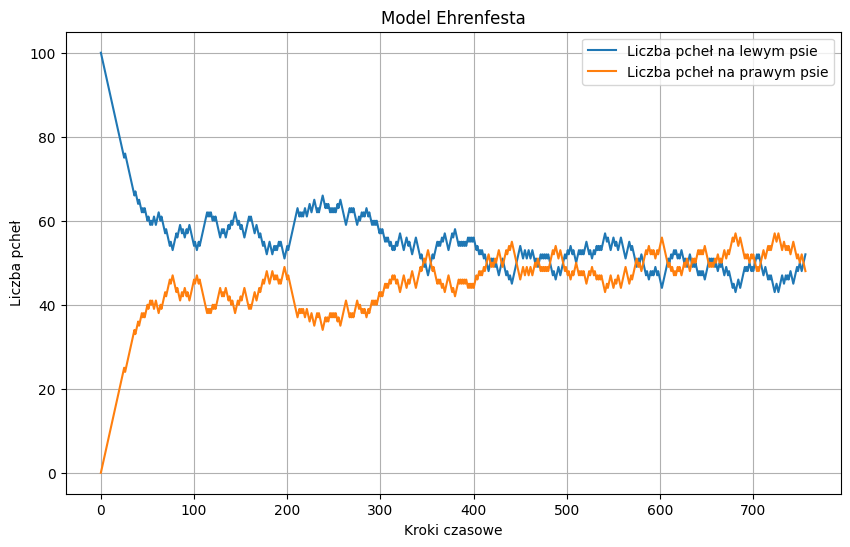

In [17]:
# zmiana prawdopodobieństwa
NL, NP = ehrenfest_model(N, steps, 3/4)

# Stworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(range(len(NL)), NL, label='Liczba pcheł na lewym psie')
plt.plot(range(len(NP)), NP, label='Liczba pcheł na prawym psie')
plt.title('Model Ehrenfesta')
plt.xlabel('Kroki czasowe')
plt.ylabel('Liczba pcheł')
plt.legend()
plt.grid(True)
plt.show()